In [1]:
import numpy as np
from preprocessed_mnist import load_dataset
import keras
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
y_train,y_val,y_test = map(keras.utils.np_utils.to_categorical,[y_train,y_val,y_test])

Using TensorFlow backend.


tf.estimator package not installed.
tf.estimator package not installed.


In [2]:
import numpy as np
from preprocessed_mnist import load_dataset
import keras
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
y_train,y_val,y_test = map(keras.utils.np_utils.to_categorical,[y_train,y_val,y_test])

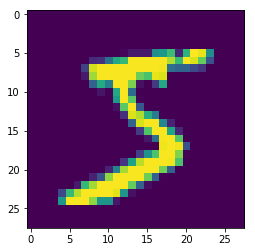

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.imshow(X_train[0]);

In [5]:
import tensorflow as tf
s = tf.InteractiveSession()

/Users/bedabratachoudhury/anaconda2/lib/python2.7/site-packages/tensorflow/python/client/session.py:1702: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [20]:
import keras
from keras.models import Sequential
import keras.layers as ll

model = Sequential(name="mlp")

model.add(ll.InputLayer([28, 28]))
model.add(ll.Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'))
model.add(ll.MaxPool1D())
model.add(ll.Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'))
model.add(ll.MaxPool1D())
model.add(ll.Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'))
model.add(ll.MaxPool1D())
model.add(ll.Conv1D(filters=100, kernel_size=4, padding='same', activation='relu'))
model.add(ll.MaxPool1D())
model.add(ll.Flatten())

# network body

model.add(ll.Dense(256))
model.add(ll.Activation('relu'))

model.add(ll.Dense(128))
model.add(ll.Activation('relu'))

model.add(ll.Dense(128))
model.add(ll.Activation('relu'))

# output layer: 10 neurons for each class with softmax
model.add(ll.Dense(10, activation='softmax'))

# categorical_crossentropy is your good old crossentropy
# but applied for one-hot-encoded vectors
model.compile("adam", "categorical_crossentropy", metrics=["accuracy"])

In [21]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_26 (Conv1D)           (None, 28, 100)           11300     
_________________________________________________________________
max_pooling1d_22 (MaxPooling (None, 14, 100)           0         
_________________________________________________________________
conv1d_27 (Conv1D)           (None, 14, 100)           40100     
_________________________________________________________________
max_pooling1d_23 (MaxPooling (None, 7, 100)            0         
_________________________________________________________________
conv1d_28 (Conv1D)           (None, 7, 100)            40100     
_________________________________________________________________
max_pooling1d_24 (MaxPooling (None, 3, 100)            0         
_________________________________________________________________
conv1d_29 (Conv1D)           (None, 3, 100)            40100     
__________

In [22]:
# fit(X,y) ships with a neat automatic logging.
#          Highly customizable under the hood.
model.fit(X_train, y_train,
          validation_data=(X_val, y_val), epochs=5);

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 25s 504us/step - loss: 0.2127 - acc: 0.9332 - val_loss: 0.0863 - val_acc: 0.9743
Epoch 2/5
50000/50000 [==============================] - 26s 526us/step - loss: 0.0749 - acc: 0.9780 - val_loss: 0.0898 - val_acc: 0.9747
Epoch 3/5
50000/50000 [==============================] - 25s 503us/step - loss: 0.0573 - acc: 0.9846 - val_loss: 0.0544 - val_acc: 0.9856
Epoch 4/5
50000/50000 [==============================] - 24s 483us/step - loss: 0.0476 - acc: 0.9868 - val_loss: 0.0600 - val_acc: 0.9849
Epoch 5/5
50000/50000 [==============================] - 24s 475us/step - loss: 0.0413 - acc: 0.9887 - val_loss: 0.0629 - val_acc: 0.9834


In [23]:
# Performance on Test Set
test_predictions = model.predict_proba(X_test).argmax(axis=-1)
test_answers = y_test.argmax(axis=-1)

test_accuracy = np.mean(test_predictions==test_answers)

In [24]:
print(test_accuracy*100,'%')

(98.54, '%')
